In [1]:
from tqdm import tqdm

In [2]:
import numpy as np
import xarray as xr
import rasterio
%matplotlib inline
from matplotlib.pyplot import *
from glob import glob
import os
import datetime

from rasterio_to_xarray import rasterio_to_xarray

In [5]:
x = rasterio_to_xarray('/Users/robin/ownCloud/HOTBAR/MAIACAAOT.h00v01.20140031240.hdf_proj.tif')

In [31]:
def maiac_file_to_da(filename):
    da = rasterio_to_xarray(filename)
    
    da.values[da.values == -28672] = np.nan
    da.values[da.values == 0] = np.nan
    
    time_str = os.path.basename(filename)[17:-13]
    time_obj = datetime.datetime.strptime(time_str, '%Y%j%H%M')
    da.coords['time'] = time_obj
    
    return da

In [32]:
files = glob('2014/*_proj.tif')

In [33]:
maiac_file_to_da(files[0])

/Users/robin/code/MAIACProcessing/rasterio_to_xarray.py:14: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  data = np.where(data == src.nodata, np.nan, data)


<xarray.DataArray (y: 1162, x: 1240)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
    time     datetime64[ns] 2014-01-01T14:30:00
Attributes:
    affine: | 1256.54, 0.00,-947639.63|
| 0.00,-1256.54, 1429277.81|
| 0.00, 0.00, 1.00|
    crs: CRS({'init': 'epsg:27700'})

In [34]:
list_of_das = map(maiac_file_to_da, files)

In [35]:
res = xr.concat(list_of_das, 'time')

/Users/robin/code/MAIACProcessing/rasterio_to_xarray.py:14: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  data = np.where(data == src.nodata, np.nan, data)


In [36]:
res

<xarray.DataArray (time: 480, y: 1162, x: 1240)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan, 

In [39]:
r = res.groupby('time.date').max(dim='time')

In [70]:
df = r.isel(x=500, y=500).dropna('date').to_pandas()

In [71]:
df.to_csv('Blah.csv')

In [72]:
!cat Blah.csv

2014-02-09,19.0
2014-02-27,89.0
2014-04-05,51.0
2014-04-07,54.0
2014-04-22,346.0
2014-05-11,168.0
2014-05-22,335.0
2014-06-05,163.0
2014-06-30,143.0


In [41]:
overall_mean = r.mean(dim='date')

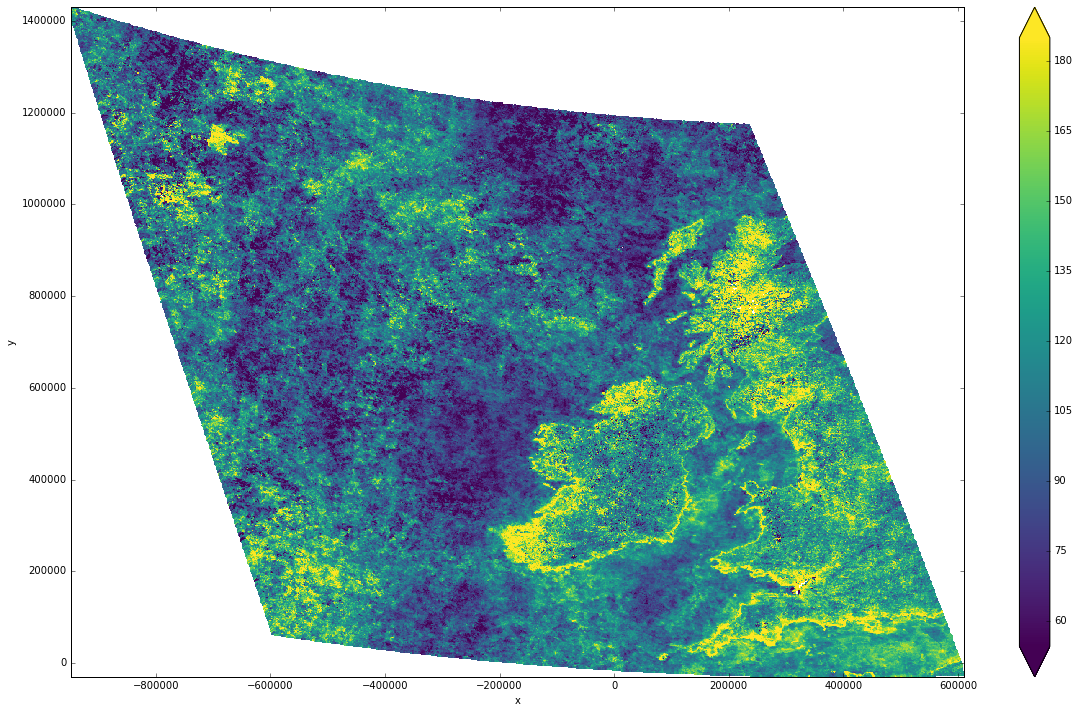

In [44]:
figure(figsize=(20, 12))
overall_mean.plot(robust=True)

In [46]:
import pandas as pd

In [49]:
r['date'] = pd.to_datetime(r['date'])

In [50]:
r['date']

<xarray.DataArray 'date' (date: 180)>
array(['2014-01-01T00:00:00.000000000+0000',
       '2014-01-03T00:00:00.000000000+0000',
       '2014-01-04T00:00:00.000000000+0000',
       '2014-01-05T00:00:00.000000000+0000',
       '2014-01-06T00:00:00.000000000+0000',
       '2014-01-07T00:00:00.000000000+0000',
       '2014-01-08T00:00:00.000000000+0000',
       '2014-01-09T00:00:00.000000000+0000',
       '2014-01-10T00:00:00.000000000+0000',
       '2014-01-11T00:00:00.000000000+0000',
       '2014-01-12T00:00:00.000000000+0000',
       '2014-01-13T00:00:00.000000000+0000',
       '2014-01-14T00:00:00.000000000+0000',
       '2014-01-15T00:00:00.000000000+0000',
       '2014-01-16T00:00:00.000000000+0000',
       '2014-01-17T00:00:00.000000000+0000',
       '2014-01-18T00:00:00.000000000+0000',
       '2014-01-19T00:00:00.000000000+0000',
       '2014-01-20T00:00:00.000000000+0000',
       '2014-01-21T00:00:00.000000000+0000',
       '2014-01-22T00:00:00.000000000+0000',
       '2014-01-2

In [54]:
seasonal = r.groupby('date.month').mean(dim='date')

In [55]:
seasonal.coords

Coordinates:
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
  * month    (month) int64 1 2 3 4 5 6

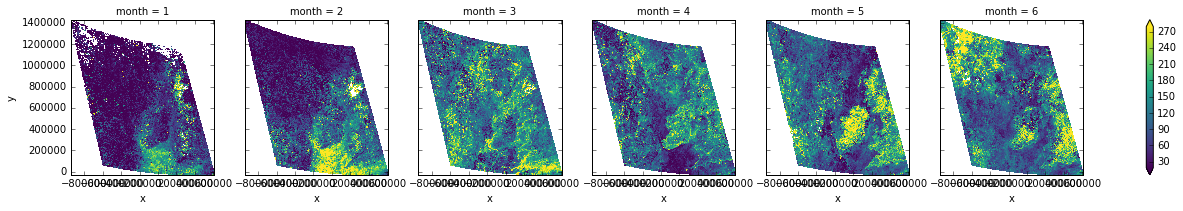

In [57]:
figure(figsize=(20, 12))
seasonal.plot(col='month', robust=True)

In [ ]:
figure(figsize=(20, 12))
mr.plot.pcolormesh(robust=True)

In [ ]:
res.plot.pcolormesh??

In [ ]:
mr.sel(x=slice(0, 600000), y=slice(mr.y.min(), mr.y.max()))

In [ ]:
res.groupby('time.month').mean(dim='time')